<a href="https://colab.research.google.com/github/Shreeraksha3/dogs-vs-cats-classifier/blob/main/Dog_vs_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
from google.colab import drive
import os
import zipfile
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Prompt user to upload kaggle.json
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [2]:

# Create the Kaggle folder and move the file
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Set permissions
os.chmod('/root/.kaggle/kaggle.json', 600)


In [3]:
!kaggle competitions download -c dogs-vs-cats




 97% 785M/812M [00:05<00:00, 236MB/s]
100% 812M/812M [00:05<00:00, 144MB/s]


In [4]:
!unzip -q dogs-vs-cats.zip -d dataset/
!unzip -o /content/dataset/train.zip -d /content/dataset/


Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/dog.5499.jpg  
  inflating: /content/dataset/train/dog.55.jpg  
  inflating: /content/dataset/train/dog.550.jpg  
  inflating: /content/dataset/train/dog.5500.jpg  
  inflating: /content/dataset/train/dog.5501.jpg  
  inflating: /content/dataset/train/dog.5502.jpg  
  inflating: /content/dataset/train/dog.5503.jpg  
  inflating: /content/dataset/train/dog.5504.jpg  
  inflating: /content/dataset/train/dog.5505.jpg  
  inflating: /content/dataset/train/dog.5506.jpg  
  inflating: /content/dataset/train/dog.5507.jpg  
  inflating: /content/dataset/train/dog.5508.jpg  
  inflating: /content/dataset/train/dog.5509.jpg  
  inflating: /content/dataset/train/dog.551.jpg  
  inflating: /content/dataset/train/dog.5510.jpg  
  inflating: /content/dataset/train/dog.5511.jpg  
  inflating: /content/dataset/train/dog.5512.jpg  
  inflating: /content/dataset/train/dog.5513.jpg  
  inflating: /content/dataset/train

In [5]:

#Move images to class folders
os.makedirs('/content/dataset/Cat', exist_ok=True)
os.makedirs('/content/dataset/Dog', exist_ok=True)

source_dir = "/content/dataset/train"
for filename in os.listdir(source_dir):
    src = os.path.join(source_dir, filename)
    if filename.lower().startswith("cat"):
        shutil.move(src, "/content/dataset/Cat/")
    elif filename.lower().startswith("dog"):
        shutil.move(src, "/content/dataset/Dog/")



In [6]:
#delete empty train folder
shutil.rmtree('/content/dataset/train')



In [7]:
!ls /content/dataset/Cat | wc -l
!ls /content/dataset/Dog | wc -l


12500
12500


In [9]:
#Define Paths
train_dir = "/content/dataset/"
IMG_SIZE = 100
BATCH_SIZE = 32


In [10]:
# Create Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

print("Class indices:", train_generator.class_indices)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Class indices: {'Cat': 0, 'Dog': 1}


In [11]:
# Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,731,905 (6.61 MB)

 Trainable params: 1,731,905 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 340s 540ms/step - accuracy: 0.5585 - loss: 0.6798 - val_accuracy: 0.7156 - val_loss: 0.5640
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 336s 538ms/step - accuracy: 0.6884 - loss: 0.5881 - val_accuracy: 0.7634 - val_loss: 0.4958
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 340s 544ms/step - accuracy: 0.7516 - loss: 0.5123 - val_accuracy: 0.7594 - val_loss: 0.4881
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 348s 557ms/step - accuracy: 0.7744 - loss: 0.4788 - val_accuracy: 0.7724 - val_loss: 0.4623
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 348s 557ms/step - accuracy: 0.7906 - loss: 0.4519 - val_accuracy: 0.8048 - val_loss: 0.4163
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 347s 555ms/step - accuracy: 0.8097 - loss: 0.4170 - val_accuracy: 0.8074 - val_loss: 0.4124
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 338s 541ms/step - accuracy: 0.8179 - loss: 0.4069 - val_accuracy: 0.8246 - val_loss: 0.3809
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 338s 541ms/step - accuracy: 0.8301 -

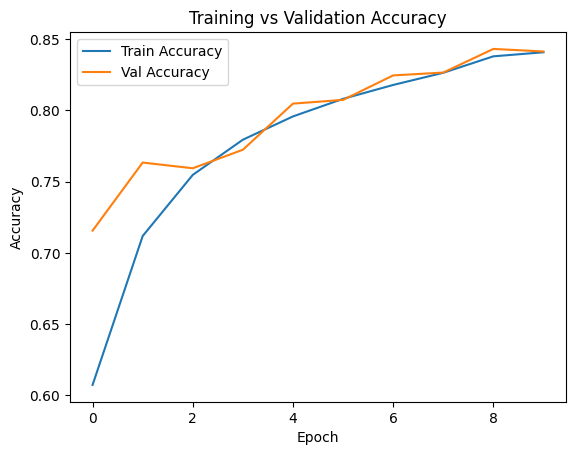

In [13]:
#plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()



In [16]:

drive.mount('/content/drive')
model.save("/content/drive/MyDrive/dogs_vs_cats_cnn_model.keras")





Mounted at /content/drive
